# Modelo de Regressão VAR

In [154]:
import pandas as pd
import numpy as np
import pandas_profiling as ProfileReport
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

In [32]:
df_caminhoes = pd.read_excel("C:/Users/User/Downloads/auto e caminhoes fenabrave.xlsx")
df_energia = pd.read_excel("C:/Users/User/Downloads/consumo de energia.xlsx")

In [33]:
df_caminhoes =df_caminhoes.iloc[7:,0:3].head(10)

In [34]:
df_caminhoes.rename(columns=df_caminhoes.iloc[0]).drop(df_caminhoes.index[0]).reset_index(drop=True)

,Nome da serie,Emplacamento de Caminhões(Nacional)(Original)(Mensal)(Nível),Emplacamento de Automóveis e Comerciais Leves(Nacional)(Original)(Mensal)(Nível)
0,2002-01-01 00:00:00,5328,108254
1,2002-02-01 00:00:00,4561,91737
2,2002-03-01 00:00:00,5310,116635
3,2002-04-01 00:00:00,5346,131601
4,2002-05-01 00:00:00,6255,115136
5,2002-06-01 00:00:00,5188,100670
6,2002-07-01 00:00:00,5274,117766
7,2002-08-01 00:00:00,4553,120610
8,2002-09-01 00:00:00,5326,122722


In [35]:
df_energia = df_energia.iloc[7:].reset_index(drop = True)

In [40]:
df_energia.columns = df_energia.iloc[0,:]

In [42]:
df_energia = df_energia.iloc[1:]

In [98]:
df_caminhoes = df_caminhoes.rename(columns = df_caminhoes.iloc[0,:])[1:]

In [99]:
df_energia['Data'] = [pd.to_datetime(i) for i in df_energia['Data']]
df_caminhoes['Nome da serie'] = [pd.to_datetime(i) for i in df_caminhoes['Nome da serie']]

<ipython-input-99-c56abee98580>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_energia['Data'] = [pd.to_datetime(i) for i in df_energia['Data']]


In [70]:
PIB = pd.read_excel('D:/我的/PIB_IPCA.xlsx','PIB')
IPCA = pd.read_excel('D:/我的/PIB_IPCA.xlsx','IPCA')

In [71]:
PIB['Data'] = [i.replace('.','-') for i in PIB['Data']]
PIB['Data'] = [pd.to_datetime(i) for i in PIB['Data']]
PIB = PIB.iloc[:,:2]

In [72]:
IPCA['Data'] = [i.replace('.','-') for i in IPCA['Data']]
IPCA['Data'] = [pd.to_datetime(i) for i in IPCA['Data']]
IPCA = IPCA.iloc[:,:2]

In [73]:
import math
PIB['Estação'] = [math.ceil(int(i.strftime('%m'))/3) for i in PIB['Data']]
IPCA['Estação'] = [math.ceil(int(i.strftime('%m'))/3) for i in IPCA['Data']]

In [79]:
PIB_REAL = pd.merge(PIB,IPCA)

In [83]:
df_energia.rename(columns={'Nome da serie':'Data'},inplace=True)

d:\python\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [102]:
df_energia = pd.merge(pd.merge(df_energia,PIB),IPCA)

In [110]:
df_energia['PIB_Var'] = df_energia['PIB'] - df_energia['PIB'].shift(1)   

In [111]:
df_energia

,Data,Consumo de Energia Elétrica Total (EPE)(Nacional)(Original)(Mensal)(Nível),Consumo de Energia Elétrica Total (EPE)(Região Centro-oeste)(Original)(Mensal)(Nível),Consumo de Energia Elétrica Total (EPE)(Região Sul)(Original)(Mensal)(Nível),Consumo de Energia Elétrica Total (EPE)(Região Sudeste)(Original)(Mensal)(Nível),Consumo de Energia Elétrica Total (EPE)(Região Norte)(Original)(Mensal)(Nível),Consumo de Energia Elétrica Total (EPE)(Região Nordeste)(Original)(Mensal)(Nível),PIB,Estação,IPCA,PIB_Var
0,2004-01-01,26978358.02,1507173.86,4510113.04,14929524.4,1574434.34,4457112.38,144558.6,1,6.04,NaN
1,2004-02-01,26508170.77,1456012.81,4690227.86,14714713.51,1507448.59,4139768.0,142861.3,1,5.60,-1697.3
2,2004-03-01,27284329.41,1534843.53,4898770.4,14903795.68,1574176.69,4372743.11,157363.5,1,5.66,14502.2
3,2004-04-01,28046182.351,1610686.661,4873311.14,15501322.96,1598862.11,4461999.48,156953.9,2,5.85,-409.6
4,2004-05-01,27244506.48,1565788.16,4723026.16,14906628.72,1625478.92,4423584.52,159498.9,2,6.42,2545.0
...,...,...,...,...,...,...,...,...,...,...,...
211,2021-08-01,40628575.03,3229521.63,7578668.669,19567126.511,3161464.87,7091793.35,739692.2,3,5.43,-4466.0
212,2021-09-01,41985319.612,3552433.54,7354639.471,20710207.661,3190894.8,7177144.14,731334.1,3,5.78,-8358.1
213,2021-10-01,42622148.53,3600279.44,7451533.11,20798024.23,3219121.3,7553190.45,739982.7,4,6.45,8648.6
214,2021-11-01,41931837.191,3364580.54,7615013.091,20301925.39,3178834.95,7471483.22,755731.3,4,6.16,15748.6


In [112]:
%matplotlib inline 

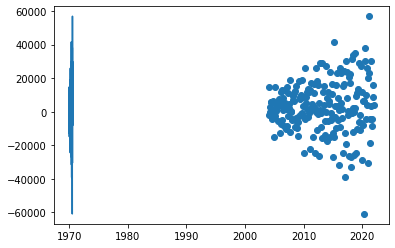

In [124]:
plt.scatter(df_energia['Data'],df_energia['PIB_Var'])

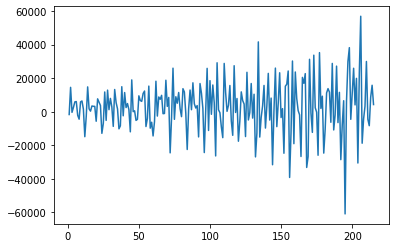

In [126]:
plt.plot(df_energia.index,df_energia['PIB_Var'])

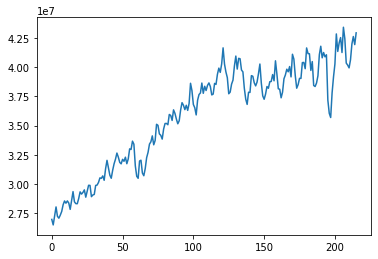

In [127]:
plt.plot(df_energia.index,df_energia['Consumo de Energia Elétrica Total (EPE)(Nacional)(Original)(Mensal)(Nível)'])

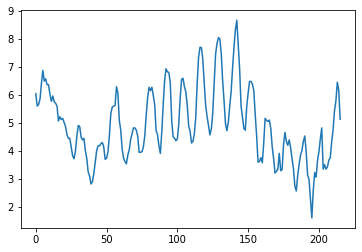

In [164]:
plt.plot(df_energia.index,df_energia['IPCA'])

In [145]:
df_energia['Consumo de Energia Nacional Var'] = df_energia['Consumo de Energia Nacional'] - df_energia['Consumo de Energia Nacional'].shift(1) 

In [134]:
df_energia.rename(columns = {'Consumo de Energia Elétrica Total (EPE)(Nacional)(Original)(Mensal)(Nível)': 'Consumo de Energia Nacional','Consumo de Energia Elétrica Total (EPE)(Região Centro-oeste)(Original)(Mensal)(Nível)':'Consumo de Energia Centro-Oeste','Consumo de Energia Elétrica Total (EPE)(Região Sul)(Original)(Mensal)(Nível)':'Consumo de Energia Sul','Consumo de Energia Elétrica Total (EPE)(Região Sudeste)(Original)(Mensal)(Nível)':'Consumo de Energia Sudeste','Consumo de Energia Elétrica Total (EPE)(Região Norte)(Original)(Mensal)(Nível)':'Consumo de Energia Norte','Consumo de Energia Elétrica Total (EPE)(Região Nordeste)(Original)(Mensal)(Nível)':'Consumo de Energia Nordeste'},inplace=True)

In [140]:
df_energia['Consumo de Energia Nacional'] = pd.to_numeric(df_energia['Consumo de Energia Nacional'])

In [141]:
df_energia.dtypes

Data                               datetime64[ns]
Consumo de Energia Nacional               float64
Consumo de Energia Centro-Oeste            object
Consumo de Energia Sul                     object
Consumo de Energia Sudeste                 object
Consumo de Energia Norte                   object
Consumo de Energia Nordeste                object
PIB                                       float64
Estação                                     int64
IPCA                                      float64
PIB_Var                                   float64
dtype: object

In [148]:
df_energia[['Consumo de Energia Nacional Var','IPCA','PIB_Var']].corr()

,Consumo de Energia Nacional Var,IPCA,PIB_Var
Consumo de Energia Nacional Var,1.000000,0.171470,0.215428
IPCA,0.171470,1.000000,-0.013178
PIB_Var,0.215428,-0.013178,1.000000


In [169]:
fuller_result_1 = adfuller(df_energia['Consumo de Energia Nacional Var'][1:])
print('Consumo de Energia')
print(f'ADF Statistic: {fuller_result_1[0]}')
print(f'p-value: {fuller_result_1[1]}')

print('------------------------------------')

ad_fuller_result_2 = adfuller(df_energia['IPCA'].diff()[1:])
print('IPCA')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('------------------------------------')

ad_fuller_result_3 = adfuller(df_energia['PIB_Var'][1:])
print('PIB')
print(f'ADF Statistic: {ad_fuller_result_3[0]}')
print(f'p-value: {ad_fuller_result_3[1]}')


Consumo de Energia
ADF Statistic: -4.421987174110232
p-value: 0.00027133711820026654
------------------------------------
IPCA
ADF Statistic: -3.5902611807651708
p-value: 0.005949965920851569
------------------------------------
PIB
ADF Statistic: -4.30243322329189
p-value: 0.00043992222613272987


In [182]:
print('O Consumo de Energia Afeta o PIB?')
print('-------------------------------')
granger_1 = grangercausalitytests(df_energia[['PIB_Var','Consumo de Energia Nacional Var']][1:],4)
print('\n-------------------------------\n')
print('PIB Afeta o Consumo de Energia?')
print('-------------------------------')
granger_2 = grangercausalitytests(df_energia[['Consumo de Energia Nacional Var','PIB_Var']][1:],4)


O Consumo de Energia Afeta o PIB?
-------------------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.2123  , p=0.0135  , df_denom=211, df_num=1
ssr based chi2 test:   chi2=6.3006  , p=0.0121  , df=1
likelihood ratio test: chi2=6.2096  , p=0.0127  , df=1
parameter F test:         F=6.2123  , p=0.0135  , df_denom=211, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.8190  , p=0.0014  , df_denom=208, df_num=2
ssr based chi2 test:   chi2=13.9658 , p=0.0009  , df=2
likelihood ratio test: chi2=13.5271 , p=0.0012  , df=2
parameter F test:         F=6.8190  , p=0.0014  , df_denom=208, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=8.2844  , p=0.0000  , df_denom=205, df_num=3
ssr based chi2 test:   chi2=25.7018 , p=0.0000  , df=3
likelihood ratio test: chi2=24.2593 , p=0.0000  , df=3
parameter F test:         F=8.2844  , p=0.0000  , df_denom=205, df_num=3

Granger Causality
number of

In [189]:
train_df = df_energia[['PIB','Consumo de Energia Nacional']][:-12]
test_df = df_energia[['PIB','Consumo de Energia Nacional']][-12:]

In [190]:
model = VAR(train_df.diff()[1:])
sorted_order = model.select_order(maxlags=20)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        46.61       46.64   1.745e+20       46.62
1        46.56       46.67   1.663e+20       46.60
2        46.46       46.64   1.508e+20       46.53
3        46.27       46.52   1.246e+20       46.37
4        46.24       46.55   1.205e+20       46.37
5        46.11       46.49   1.058e+20       46.26
6        45.91       46.36   8.660e+19       46.09
7        45.86       46.39   8.287e+19       46.08
8        45.75       46.35   7.397e+19       45.99
9        45.69       46.35   6.962e+19       45.96
10       45.49       46.22   5.687e+19       45.78
11       45.29       46.10   4.674e+19       45.62
12       45.18      46.05*   4.178e+19       45.53
13       45.14       46.08   4.025e+19      45.52*
14       45.12       46.14   3.957e+19       45.53
15       45.13       46.22   4.017e+19       45.57
16      45.11*       46.27  3.9

d:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [191]:
var_model = VARMAX(train_df,order =(4,0), enforce_stationarity=True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

d:\python\lib\site-packages\statsmodels\tsa\statespace\varmax.py:374: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\python\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     Statespace Model Results                                     
Dep. Variable:     ['PIB', 'Consumo de Energia Nacional']   No. Observations:                  204
Model:                                             VAR(4)   Log Likelihood               -5918.470
                                              + intercept   AIC                          11878.940
Date:                                    Sun, 06 Mar 2022   BIC                          11948.620
Time:                                            00:57:52   HQIC                         11907.127
Sample:                                                 0                                         
                                                    - 204                                         
Covariance Type:                                      opg                                         
Ljung-Box (L1) (Q):          95.94, 145.55   Jarque-Bera (JB):           2.69, 1.08
Prob(Q):                 

In [192]:
n_forecast = 12
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast -1)

predictions = predict.predicted_mean

In [193]:
predictions

,PIB,Consumo de Energia Nacional
204,668165.251318,4.311975e+07
205,653856.289340,4.247881e+07
206,663227.236724,4.365502e+07
207,654692.782684,4.382739e+07
208,639537.987959,4.298036e+07
209,635502.542907,4.265174e+07
210,631893.134034,4.210753e+07
211,630115.027944,4.176700e+07
212,626469.748224,4.162077e+07
213,624075.858534,4.159865e+07


In [194]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)

<AxesSubplot:>

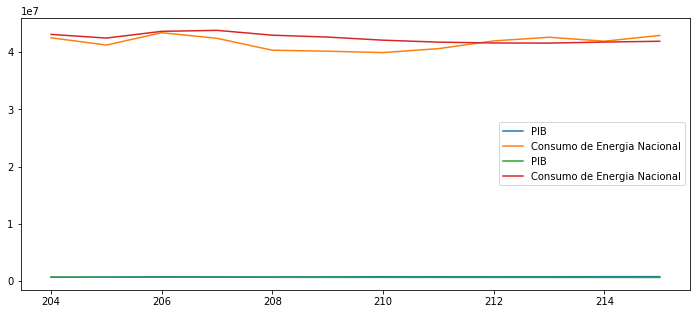

In [195]:
test_vs_pred.plot(figsize=(12,5))